Here I generate some synthetic 2d (1d data + label) data and then use linear regression on the data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Generate some data with proper values of w_0 and w_1
Given some x
y takes the form
y= w_0+w_1*x;

Purpose given a bunch of x values and corresponding y values, I want to learn my w_0 and w_1
x= [1 2 150 1 1.2]
y= 2500000

y= w_0(1)+ w_1(2)+ w_2(150)+....



In [20]:
X = 2 * np.random.rand(100,1)
y = 5 + 8 * X +np.random.rand(100,1)
#y= 5 + 8 * X



w_0 = 5 and w_1=8
to the labels I have added random noise

Plot the data


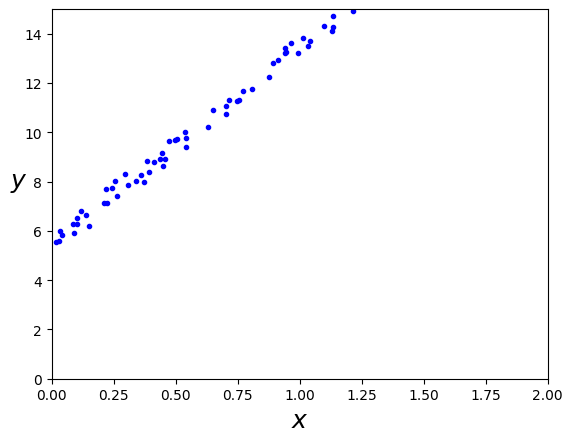

In [21]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

w_0 is multiplying with the value 1,
if your data was say x =[20000],
since I am using the bias term the overall effect is like
x_b= [1 20000]
w=[w_0 w_1]

w_best = (X^TX)^-1 (X^Ty)

In [ ]:
X_b = np.c_[np.ones((100,1)),X]
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(w_best)

[[5.42420582]
 [8.09565717]]


Below the same linear Regression is implemented using Python sklearn

In [22]:
from sklearn.linear_model import LinearRegression

Typical steps in sklearn
1.Model

2.Fit

3.Transform/Predict

In [23]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

Fit step will use the training data

In [24]:
reg.coef_

array([[8.01196262]])

In [25]:
reg.intercept_

array([5.4923671])

Predicting on new data and plotting

In [48]:
X_new = np.array([[3]])
#X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = reg.predict(X_new)
y_predict

array([[29.52825496]])

(np.float64(0.0), np.float64(2.0), np.float64(0.0), np.float64(15.0))

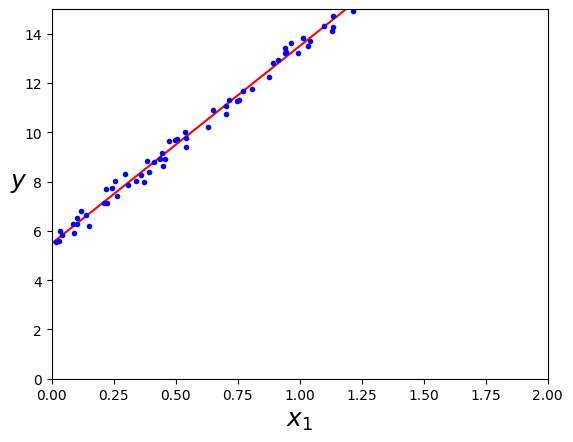

In [28]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


Implementing Logistic Regression on the breast cancer dataset


In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#import pandas as pd

In [41]:
X,y = load_breast_cancer(return_X_y = True)

In [42]:
X[23],y[23]

(array([2.116e+01, 2.304e+01, 1.372e+02, 1.404e+03, 9.428e-02, 1.022e-01,
        1.097e-01, 8.632e-02, 1.769e-01, 5.278e-02, 6.917e-01, 1.127e+00,
        4.303e+00, 9.399e+01, 4.728e-03, 1.259e-02, 1.715e-02, 1.038e-02,
        1.083e-02, 1.987e-03, 2.917e+01, 3.559e+01, 1.880e+02, 2.615e+03,
        1.401e-01, 2.600e-01, 3.155e-01, 2.009e-01, 2.822e-01, 7.526e-02]),
 np.int64(0))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[1], y_train[1]

(array([-0.71766069, -0.22131541, -0.70228899, -0.70500943,  1.36813763,
        -0.02513728, -0.2155511 , -0.35689103, -0.01598413,  0.39050653,
        -0.36530886,  0.77554801, -0.35729565, -0.46098117,  0.49449275,
        -0.10502041, -0.07573659,  0.36186143, -0.57048367,  0.04023811,
        -0.66144165,  0.58079204, -0.66055587, -0.65214927,  1.62332396,
         0.10806901,  0.08672146,  0.13372742, -0.14065018,  0.45177473]),
 np.int64(1))

In [45]:
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data, to test the model
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1])

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
accuracy = print('Accuracy score of the  model is ',accuracy_score(y_test, y_pred))
print('F1 Score of the model is ',f1_score(y_test, y_pred))
confusion_matrix(y_test, y_pred, labels = [1, 0])

Accuracy score of the  model is  0.9736842105263158
F1 Score of the model is  0.9795918367346939


array([[72,  1],
       [ 2, 39]])

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Model Performance:")
print('Accuracy score:', accuracy_score(y_test, y_pred_svm))
print('F1 Score:', f1_score(y_test, y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm, labels = [1, 0]))
print("-" * 30)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=16)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Model Performance:")
print('Accuracy score:', accuracy_score(y_test, y_pred_dt))
print('F1 Score:', f1_score(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt, labels = [1, 0]))
print("-" * 30)

# Random Forest
rf_model = RandomForestClassifier(random_state=16)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Model Performance:")
print('Accuracy score:', accuracy_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf, labels = [1, 0]))
print("-" * 30)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=16)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Model Performance:")
print('Accuracy score:', accuracy_score(y_test, y_pred_gb))
print('F1 Score:', f1_score(y_test, y_pred_gb))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_gb, labels = [1, 0]))
print("-" * 30)

SVM Model Performance:
Accuracy score: 0.9736842105263158
F1 Score: 0.9795918367346939
Confusion Matrix:
 [[72  1]
 [ 2 39]]
------------------------------
Decision Tree Model Performance:
Accuracy score: 0.9649122807017544
F1 Score: 0.972972972972973
Confusion Matrix:
 [[72  1]
 [ 3 38]]
------------------------------
Random Forest Model Performance:
Accuracy score: 0.9824561403508771
F1 Score: 0.9864864864864865
Confusion Matrix:
 [[73  0]
 [ 2 39]]
------------------------------
Gradient Boosting Model Performance:
Accuracy score: 0.9824561403508771
F1 Score: 0.9864864864864865
Confusion Matrix:
 [[73  0]
 [ 2 39]]
------------------------------


# Task
Perform ridge and lasso regression on the regression data for different values of the regularization parameter and plot the values against the loss.

## Import necessary libraries

### Subtask:
Import `Ridge`, `Lasso`, and `mean_squared_error` from `sklearn`. Also, import `numpy` for creating a range of alpha values.


**Reasoning**:
The subtask requires importing specific classes and functions from scikit-learn and the numpy library. These imports are necessary to perform Ridge and Lasso regression and evaluate their performance.



In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

## Define alpha values

### Subtask:
Create a range of alpha (regularization parameter) values to experiment with.


**Reasoning**:
Create a range of alpha values for the regularization parameter using a logarithmic scale.



In [ ]:
alphas = np.logspace(-3, 3, 100)

## Perform ridge regression

### Subtask:
Iterate through the alpha values, train a Ridge model for each alpha, predict on the data, and calculate the mean squared error (loss). Store the alpha values and corresponding losses.


**Reasoning**:
Iterate through the alpha values, train a Ridge model for each alpha, predict on the data, calculate the mean squared error, and store the results.



In [ ]:
ridge_losses = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    y_predict_ridge = ridge_model.predict(X)
    mse_ridge = mean_squared_error(y, y_predict_ridge)
    ridge_losses.append(mse_ridge)

## Perform lasso regression

### Subtask:
Perform lasso regression for each alpha value, calculate the mean squared error, and store the losses.


**Reasoning**:
Implement Lasso regression for each alpha value, calculate the mean squared error, and store the losses as instructed.



In [ ]:
lasso_losses = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X, y)
    y_predict_lasso = lasso_model.predict(X)
    mse_lasso = mean_squared_error(y, y_predict_lasso)
    lasso_losses.append(mse_lasso)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.677e+01, tolerance: 1.330e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.672e+01, tolerance: 1.330e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.672e+01, tolerance: 1.330e

## Visualize the results

### Subtask:
Plot the alpha values against the mean squared error for both Ridge and Lasso regression to show how the loss changes with different regularization strengths.


**Reasoning**:
Plot the calculated MSE for Ridge and Lasso regressions against the alpha values on a logarithmic scale to visualize the effect of regularization strength on the loss.



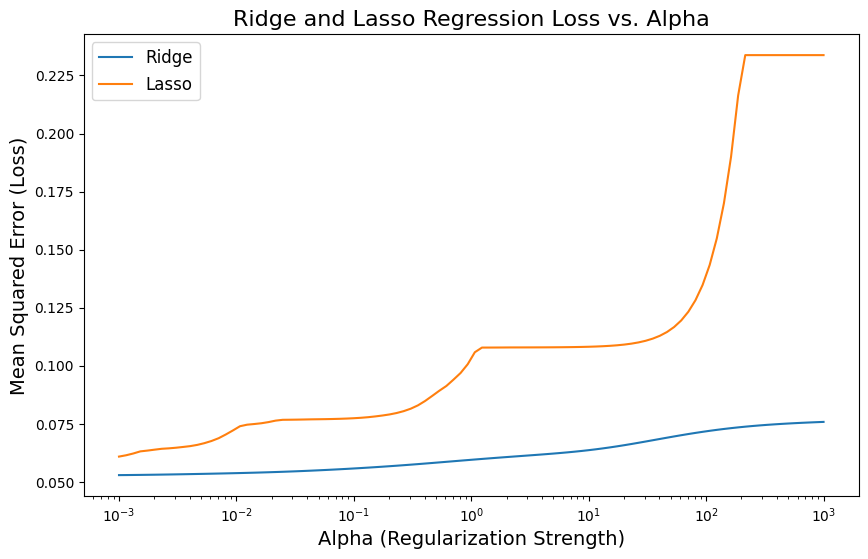

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(alphas, ridge_losses, label='Ridge')
ax.plot(alphas, lasso_losses, label='Lasso')

ax.set_xscale('log')
ax.set_xlabel('Alpha (Regularization Strength)', fontsize=14)
ax.set_ylabel('Mean Squared Error (Loss)', fontsize=14)
ax.set_title('Ridge and Lasso Regression Loss vs. Alpha', fontsize=16)
ax.legend(fontsize=12)

plt.show()

## Summary:

### Data Analysis Key Findings

*   The mean squared error (loss) for both Ridge and Lasso regression varies with different values of the regularization parameter (alpha).
*   The x-axis of the plot, representing the alpha values, is displayed on a logarithmic scale, ranging from \$10^{-3}\$ to \$10^{3}\$.
*   The plot visually demonstrates the relationship between the regularization strength and the model's loss for both Ridge and Lasso regression.

### Insights or Next Steps

*   Analyze the plot to determine the optimal range of alpha values that minimize the mean squared error for both Ridge and Lasso regression on this specific dataset.
*   Investigate the convergence warnings observed during the Lasso regression and consider increasing the maximum number of iterations or scaling the data if necessary for more robust model fitting.
